### 1. Vector and Matrices (10 points)



In [ ]:
# loading my libraries for the necessary calclulations 

import numpy as np
from numpy import random

###### 1.1 Generating two random integer matrices 

In [ ]:
# setting the seed to be the last digit of my student number to get consistent random results.

np.random.seed(1) 

# generating random integer matrix X with 3x4 dimensions

X = np.random.randint(10, size=(3, 4))
print(X)

[[5 8 9 5]
 [0 0 1 7]
 [6 9 2 4]]


In [ ]:
# generating random integer matrix Y with 4x3 dimensions

Y = np.random.randint(10, size=(4,3))
print(Y)

[[5 2 4]
 [2 4 7]
 [7 9 1]
 [7 0 6]]


##### 1.2 Generating two random integer vectors

In [ ]:
# generating vector g with 4 elements

g = np.random.randint(10, size=(4))
print(g)

[9 9 7 6]


In [ ]:
# generating vector z with 4 elements

z = np.random.randint(10, size=(4))
print(z)

[9 1 0 1]


##### For this task, you will also find the solutions to the questions asked implemented by hand in "Handwritten_notes_Adamopoulou'.pdf file. For the following tasks, I used numpy functions for the calculations of the questions asked. 

_Tasks were completed using material from class, as well as material found in the official NumPy Documentation website https://numpy.org/doc/stable/reference/generated/numpy.dot.html_

In [ ]:
# computing the inner product of g and z

np.inner(g, z)

96

In [ ]:
# computing the matrix-vector product Xg

np.dot(X,g,out=None)

array([210,  49, 173])

In [ ]:
# computing the matrix-dot product XY

np.matmul(X,Y)

array([[139, 123, 115],
       [ 56,   9,  43],
       [ 90,  66, 113]])

In [ ]:
# trying a second way to calculate the matrix product

np.dot(X,Y) 

array([[139, 123, 115],
       [ 56,   9,  43],
       [ 90,  66, 113]])

In [ ]:
# importing the linalg submodule for calculating the Frobenius norms of vectors and matrices 

from numpy import linalg as LA

In [ ]:
# computing l2 / Frobenius norm of vector g

LA.norm(g)

15.716233645501712

In [ ]:
# computing l2 / Frobenius norm of vector z

LA.norm(z)

9.1104335791443

In [ ]:
# computing l2 / Frobenius norm of matrix X

LA.norm(X)

19.544820285692065

In [ ]:
# computing l2 / Frobenius norm of matrix X

LA.norm(Y)

18.16590212458495

### 2. Gradient Computation

##### Computations by hand to this two-part task will be found in 'Handwritten_notes_Adamopoulou.pdf' file. 

### 3. Linear Regression 

##### 3.1 Computations by hand to the first task will be found in 'Handwritten_notes_Adamopoulou.pdf' file. 

#### 3.2 Implementation

In [ ]:
# loading libraries 

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, metrics, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns

In [ ]:
# importing the HousingData dataset using Pandas

filename = "HousingData.csv"
data = pd.read_csv(filename)

# many NA values in the dataset, which we do not need
# removing missing values using Pandas dropna() function

data.dropna(axis=0, how='any', inplace=True)

# using head() function to get the first 5 rows of the dataset (5 by default)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
# label y is MEDV, the target variable
# X are the features 


y = data.MEDV
X = data.drop('MEDV', axis=1) # dropping labels from column (1)

**Note**: The following _plot_data_ function is written for plotting the data. Given that it was requested to use Matplotlib, I tried to utilize all the available documentation. <br> Firstly, I tried to use Multidimensional plots, to depict somehow all features together in relation to the target variable, but with no luck, since I could not understand and implement in written code the related documentation. Also, it was not clear (and it still isn't) if plotting features this way would be possible, or functional. <br> For the completion of this task, I applied **Matplotlib documentation** and generated the following **scatter plots**. Scatter plots are pretty useful when we want to show the relationship between two variables, and also very handy when we're dealing with Linear Regression problems. In this case, I plotted 13 of them, one for every feature in relation to the target variable y. 

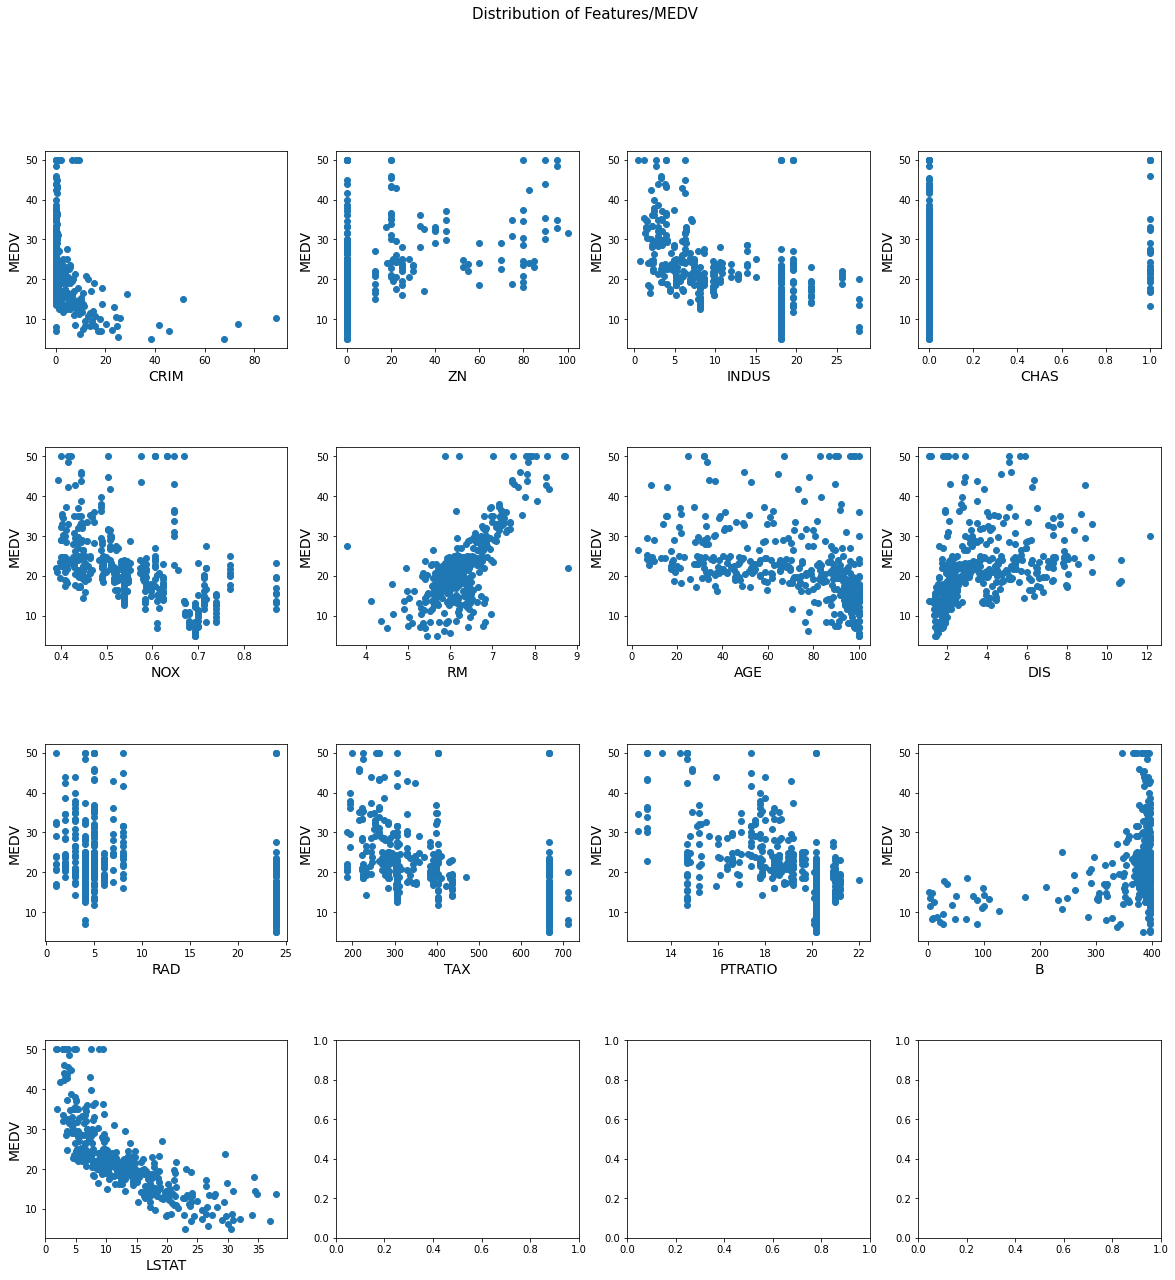

In [ ]:
def plot_data(x,y):
    
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
    fig.subplots_adjust(hspace=0.5)
    fig.suptitle('Distribution of Features/MEDV',fontsize=15)
    for ax, feature in zip(axes.flatten(),x.columns):      
        ax.scatter(x[feature],y)
        ax.set_xlabel(feature, fontsize=14)
        ax.set_ylabel('MEDV', fontsize=14)
    plt.show()

plot_data(X,y)

##### Training the model and evaluating the results

In [ ]:
# creating a function for reusing it with different ratios (for Question 3)
# variety of ratios will be added later on

def lr_model_fit_and_metrics(X_train, X_test, y_train, y_test):
    

    # fitting the model in the train data
    
    lr_model = LinearRegression().fit(X_train, y_train)
    
    # computing the coefficients and the intercept

    print('Coefficient is:',lr_model.coef_)
    print()
    print('Intercept is:',lr_model.intercept_)
    print()

    # prediction of y_train and y_test using X_train and X_test
    
    y_train_pred = lr_model.predict(X_train)
    y_test_pred = lr_model.predict(X_test)

    # calculating RSE (Residual Standard Error) and R-squared (Coefficient of determination) for train data
    # calculating MSE too (necessary to proceed with RSE calculation)
    
    train_mse = mean_squared_error(y_train,y_train_pred)
    train_rse = math.sqrt(train_mse/(X_train.shape[0]-2))
    train_rsquare = lr_model.score(X_train,y_train)

    print(f"Train RSE is: {train_rse}.")
    print(f"Train R-squared is: {train_rsquare}.")
    print()

    # calculating RSE and R^2 for test data
    # calculating MSE too (necessary to proceed with RSE calculation)

    test_mse = mean_squared_error(y_test,y_test_pred)
    test_rse = math.sqrt(train_mse/(X_test.shape[0]-2))
    test_rsquare = lr_model.score(X_test,y_test)

    print(f"Test RSE is: {test_rse}.")
    print(f"Test R-squared is: {test_rsquare}.")    

##### Testing the model using different ratios 

In [ ]:
# splitting X and y into train and test data accordingly - using as ratio 10% test, 90% training

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1)

lr_model_fit_and_metrics(X_train, X_test, y_train, y_test)

Coefficient is: [-1.00802469e-01  4.56363552e-02  1.83004925e-02  3.06748422e+00
 -1.97826950e+01  3.73408843e+00 -5.96591600e-03 -1.48820149e+00
  2.68680412e-01 -1.05604742e-02 -8.85672663e-01  9.27815032e-03
 -4.78087339e-01]

Intercept is: 36.28852118500974

Train RSE is: 0.23482045033050336.
Train R-squared is: 0.7554653871821428.

Test RSE is: 0.7146862883826791.
Test R-squared is: 0.8211172201509973.


In [ ]:
# splitting X and y into train and test data accordingly - using as ratio 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

lr_model_fit_and_metrics(X_train, X_test, y_train, y_test)

Coefficient is: [-9.53012946e-02  3.89290987e-02  2.33917058e-02  3.81829596e+00
 -1.80701819e+01  3.85244133e+00 -8.22120380e-03 -1.43303959e+00
  2.37177980e-01 -9.59284468e-03 -8.43337846e-01  7.68163477e-03
 -5.22587434e-01]

Intercept is: 34.78089496283873

Train RSE is: 0.2534171547527284.
Train R-squared is: 0.7545891471058722.

Test RSE is: 0.5109316624329339.
Test R-squared is: 0.7942508981292821.


In [ ]:
# splitting X and y into train and test data accordingly - using as ratio 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

lr_model_fit_and_metrics(X_train, X_test, y_train, y_test)

Coefficient is: [-3.58636228e-02  3.24829498e-02  1.33493183e-02  3.40461874e+00
 -1.48111830e+01  4.22920221e+00 -5.62155714e-03 -1.33656374e+00
  2.50294586e-01 -1.10515925e-02 -8.41858855e-01  1.12437919e-02
 -5.64539136e-01]

Intercept is: 29.744975249353413

Train RSE is: 0.2683876978487488.
Train R-squared is: 0.7668573443271657.

Test RSE is: 0.4099689803289426.
Test R-squared is: 0.735751699930767.


#### Discussion on evaluation: 

For the task above, I used different ratios to test the model and check the results. In general, the model seemed to give better results when 10% test & 90% training ratio was used. <br> Before commenting on the results I got, I'd like to note down what I have understood from the whole theory behind these values; RSE and R-squared. **RSE**(Residual Standard Error)  is the  deviation between the predicted outcome and the true regression line. Trying to visualize it, I imagine a typical graph (a scatter plot and the regression line). The shorter the distance between the "values" and the regression line, the better our model is. So, the RSE is the sum of the total distances squared (to get positive result). <br> Regarding **R-squared**, interpreting it was much easier. It takes a value between 0 and 1, and the general idea is that an R-squared closer to 0 is not a good indicator, whereas a value closer to 1 indicates that the model is well- generalized and the better the model fits the data. <br> Back to the results from my own task, I got a good test R-squared (0.8211172201509973) and the train R-squared was also pretty close to it (0.7554653871821428), meaning that my model was generalized good enough.<br> I noticed when I changed the ratios, the results did change too. My test R-squared for example showed a cathodic movement, probably meaning that using more test data (e.g. 20% Test Data), did not give so good predictions. <br> Finally, there are some specific points I could not really interpret (for example, why my train RSE and the test RSE are inversely proportional, when changing the ratios). I understand that these two results refer to two different things; the train RSE shows the deviation with the data I already used to train the model, whereas the test RSE result is determined by new data, but I still cannot understand the inversed proportion. 

### Bonus Exercise

I tried to make my model even better, by observing the data in the plots above. With a quick look someone can understand that CRIM and CHAS are scattered in a way, that if you imagine the regression line passing through the plot, the values are so far away from the line. Other data seem to be more useful to our purpose, for example RM or LSTAT, which are scattered in a way that they remind us of a line. <br> For this reason, I decided to omit CRIM and CHAS, just to observe if my model will give me better results (better than 1st effort with 10% ratio where R-squared was 0.8211172201509973). <br> Below, as you can see, I indeed got a better outcome, an R-squared value even closer to 1 (0.822950243245742). <br> Consequently, by omitting data that were not really helpful led to a better fit and better results. 

In [ ]:
filename = "HousingData.csv"

data = pd.read_csv(filename)

data.dropna(axis=0, how='any', inplace=True)

data = data.drop(['CRIM','CHAS'], axis=1)

data.head()

,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
y = data.MEDV
X = data.drop('MEDV', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1)

lr_model_fit_and_metrics(X_train, X_test, y_train, y_test)

Coefficient is: [ 4.13788846e-02  4.10553123e-02 -1.84322370e+01  3.88325810e+00
 -5.56043287e-03 -1.42679657e+00  2.31414324e-01 -1.16616497e-02
 -9.12285541e-01  1.15066100e-02 -5.03727310e-01]

Intercept is: 34.78531991785865

Train RSE is: 0.24148266387602735.
Train R-squared is: 0.741392912456922.

Test RSE is: 0.7349630260542142.
Test R-squared is: 0.822950243245742.
